In [5]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')


In [6]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
model=Sequential()
model.add(Conv2D(100,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [8]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Train on 990 samples, validate on 248 samples
Epoch 1/20
990/990 [==============================] - 126s 127ms/step - loss: 0.7207 - accuracy: 0.5192 - val_loss: 0.6596 - val_accuracy: 0.5685
Epoch 2/20
990/990 [==============================] - 131s 132ms/step - loss: 0.5931 - accuracy: 0.6687 - val_loss: 0.4795 - val_accuracy: 0.8024
Epoch 3/20
990/990 [==============================] - 125s 126ms/step - loss: 0.3676 - accuracy: 0.8414 - val_loss: 0.3228 - val_accuracy: 0.8992
Epoch 4/20
990/990 [==============================] - 122s 124ms/step - loss: 0.2650 - accuracy: 0.8929 - val_loss: 0.3373 - val_accuracy: 0.8790
Epoch 5/20
990/990 [==============================] - 120s 121ms/step - loss: 0.2173 - accuracy: 0.9222 - val_loss: 0.2477 - val_accuracy: 0.9032
Epoch 6/20
990/990 [==============================] - 125s 127ms/step - loss: 0.1490 - accuracy: 0.9384 - val_loss: 0.2238 - val_accuracy: 0.9234
Epoch 7/20
990/990 [==============================] - 126s 127ms/step - loss: 

In [9]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

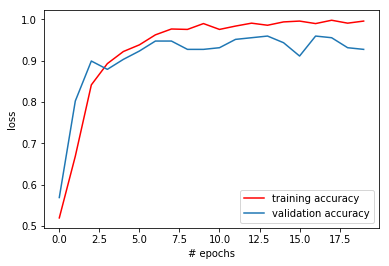

In [10]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [11]:
print(model.evaluate(test_data,test_target))

138/138 [==============================] - 4s 27ms/step
[0.215143754646398, 0.9347826242446899]
